In [12]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import seaborn as sns
import os
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#importing a scoring metric to compare methods
from sklearn.metrics import r2_score
%matplotlib inline

welltory = pd.read_csv("../data/raw/hrv_measurements.csv")



In [13]:
for col in welltory.columns:
    print(col)

user_code
rr_code
measurement_datetime
time_of_day
bpm
meanrr
mxdmn
sdnn
rmssd
pnn50
mode
amo
lf
hf
vlf
lfhf
total_power
how_feel
how_mood
how_sleep
tags
rr_data


In [14]:
welltory.measurement_datetime[1]
welltory.dtypes


user_code                object
rr_code                  object
measurement_datetime     object
time_of_day              object
bpm                       int64
meanrr                  float64
mxdmn                   float64
sdnn                    float64
rmssd                   float64
pnn50                   float64
mode                    float64
amo                     float64
lf                      float64
hf                      float64
vlf                     float64
lfhf                    float64
total_power             float64
how_feel                  int64
how_mood                  int64
how_sleep               float64
tags                     object
rr_data                  object
dtype: object

In [15]:
welltory["measurement_datetime"]


0       2020-04-21 21:23:08
1       2020-04-26 11:19:25
2       2020-04-24 10:08:25
3       2020-04-26 20:42:40
4       2020-04-29 22:33:33
               ...         
1943    2020-04-16 09:31:40
1944    2020-04-15 09:32:00
1945    2020-04-12 09:32:37
1946    2020-04-11 16:52:44
1947    2020-04-14 17:47:06
Name: measurement_datetime, Length: 1948, dtype: object

In [16]:
welltory["measurement_DT"] = pd.to_datetime(welltory["measurement_datetime"]) #converting the object to a datetime object, making a new variable called measurement_DT
welltory.dtypes

user_code                       object
rr_code                         object
measurement_datetime            object
time_of_day                     object
bpm                              int64
meanrr                         float64
mxdmn                          float64
sdnn                           float64
rmssd                          float64
pnn50                          float64
mode                           float64
amo                            float64
lf                             float64
hf                             float64
vlf                            float64
lfhf                           float64
total_power                    float64
how_feel                         int64
how_mood                         int64
how_sleep                      float64
tags                            object
rr_data                         object
measurement_DT          datetime64[ns]
dtype: object

In [17]:
welltory["measurement_date"] = welltory["measurement_DT"].dt.normalize() #removing the timestamp and just keeping the date
welltory['measurement_date'] = welltory['measurement_date'].apply(lambda x: pd.Timestamp(x).strftime('%m-%d-%Y')) #reordering the date

In [18]:
welltory.sort_values(by = "measurement_date")
welltory.isnull().any() #checking for missing data

user_code               False
rr_code                 False
measurement_datetime    False
time_of_day             False
bpm                     False
meanrr                  False
mxdmn                   False
sdnn                    False
rmssd                   False
pnn50                   False
mode                    False
amo                     False
lf                      False
hf                      False
vlf                     False
lfhf                    False
total_power             False
how_feel                False
how_mood                False
how_sleep                True
tags                     True
rr_data                 False
measurement_DT          False
measurement_date        False
dtype: bool

In [19]:
#taking the natural log of rmssd, so that data are easier to interpret
welltory['lnrmssd'] = np.log(welltory['rmssd'])

#sns.replot(x = rmssd)

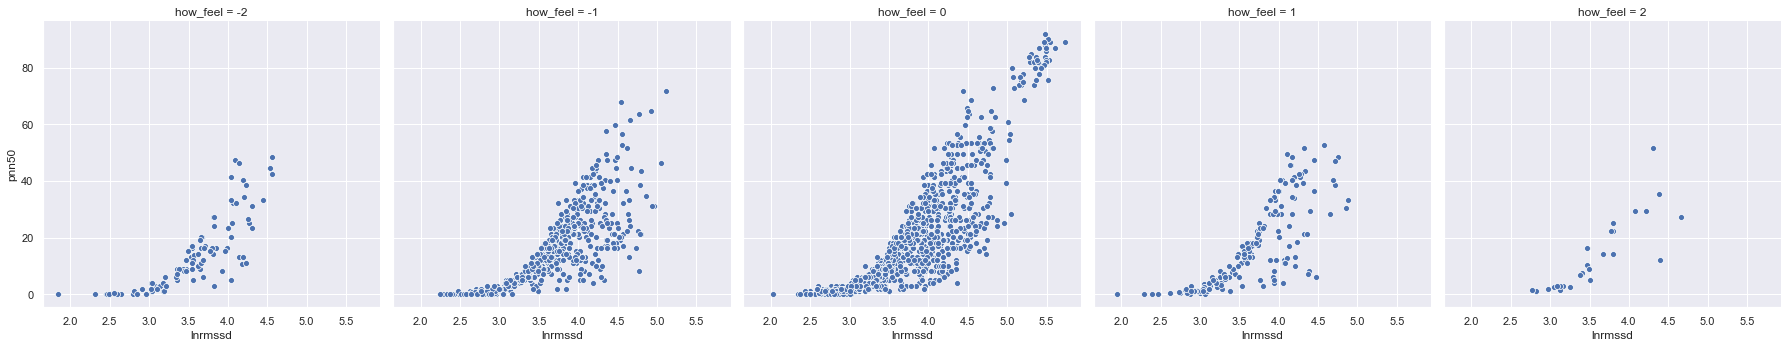

In [20]:
sns.set()
sns.relplot(x = "lnrmssd", y = "pnn50", col = "how_feel", data = welltory); #semi colon to get rid of the text on top of graph

In [21]:
hrv_ts = welltory.groupby(['measurement_date', 'user_code'],
                         as_index = False)[['rmssd', 'pnn50', 'bpm']].mean() #making a new data frame of aggregated HRV meeasurements

In [22]:
hrv_ts

,measurement_date,user_code,rmssd,pnn50,bpm
0,01-01-2020,b9b65b7a69,31.199,8.08,78.0
1,01-01-2020,cdfbcad405,80.053,27.27,73.0
2,01-01-2020,fcf3ea75b0,71.186,41.41,64.0
3,01-02-2020,fcf3ea75b0,93.866,67.68,57.0
4,01-03-2020,a1c2e6b2eb,48.375,27.27,64.0
...,...,...,...,...,...
1118,05-12-2020,fde84801d8,38.759,20.20,75.0
1119,05-12-2020,fe6c1b1349,52.788,12.12,77.0
1120,12-31-2019,01bad5a519,21.196,4.04,78.0
1121,12-31-2019,cdfbcad405,44.779,25.25,55.0


In [23]:
hrv_ts.isnull().any() #checking for missing values

measurement_date    False
user_code           False
rmssd               False
pnn50               False
bpm                 False
dtype: bool

In [24]:
wearables = pd.read_csv("../data/raw/wearables.csv")
wearables.columns
#wearables.isnull().any() #checking missings

Index(['user_code', 'day', 'resting_pulse', 'pulse_average', 'pulse_min',
       'pulse_max', 'average_spo2_value', 'body_temperature_avg',
       'stand_hours_total', 'steps_count', 'distance', 'steps_speed',
       'total_number_of_flights_climbed', 'active_calories_burned',
       'basal_calories_burned', 'total_calories_burned',
       'average_headphone_exposure', 'average_environment_exposure'],
      dtype='object')

In [25]:
wearables[['user_code','day','distance']].tail(50)

,user_code,day,distance
2050,fcf3ea75b0,2020-04-11,5230.0
2051,fcf3ea75b0,2020-04-12,2881.0
2052,fcf3ea75b0,2020-04-13,3091.0
2053,fcf3ea75b0,2020-04-14,3829.0
2054,fcf3ea75b0,2020-04-15,2511.0
2055,fcf3ea75b0,2020-04-16,4451.0
2056,fcf3ea75b0,2020-04-17,4342.0
2057,fcf3ea75b0,2020-04-18,4205.0
2058,fcf3ea75b0,2020-04-19,3527.0
2059,fcf3ea75b0,2020-04-20,1805.0


In [26]:
wearables["measurement_date"] = pd.to_datetime(wearables["day"]) #converting the object to a datetime object, making a new variable called measurement_date

In [27]:
wearables['measurement_date'] = wearables['measurement_date'].apply(lambda x: pd.Timestamp(x).strftime('%m-%d-%Y')) #reordering the dat

In [28]:
wearables_ts = wearables.groupby(['measurement_date','user_code'], #preserves the missing values for later imputation
                                 as_index = False).agg({'steps_count': lambda x: x.sum(skipna = False),
                                                       'active_calories_burned': lambda x: x.sum(skipna = False),
                                                       'distance': lambda x: x.sum(skipna = False), 
                                                       'steps_speed': lambda x: x.sum(skipna = False),
                                                       'body_temperature_avg': lambda x: x.sum(skipna = False),
                                                       'pulse_average': lambda x: x.sum(skipna = False),
                                                       'stand_hours_total': lambda x: x.sum(skipna = False),
                                                       'total_number_of_flights_climbed': lambda x: x.sum(skipna = False),
                                                       'pulse_min': lambda x: x.sum(skipna = False), 
                                                       'pulse_max': lambda x: x.sum(skipna = False),
                                                       'average_spo2_value': lambda x: x.sum(skipna = False)})

In [29]:
wearables_ts #dataframe with missing values preserved

,measurement_date,user_code,steps_count,active_calories_burned,distance,steps_speed,body_temperature_avg,pulse_average,stand_hours_total,total_number_of_flights_climbed,pulse_min,pulse_max,average_spo2_value
0,01-01-2020,0d297d2410,4153.0,104.0,3060.0,32.98,NaN,85.0,3.0,8.0,47.0,118.0,NaN
1,01-01-2020,35c7355282,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,57.0,128.0,NaN
2,01-01-2020,4985083f4d,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,60.0,129.0,NaN
3,01-01-2020,5d200bd1c6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN
4,01-01-2020,6be5033971,NaN,NaN,NaN,NaN,NaN,62.0,NaN,28.0,46.0,98.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,05-12-2020,78cc008261,NaN,NaN,NaN,NaN,NaN,74.0,NaN,NaN,74.0,74.0,NaN
2096,05-12-2020,aa036185e3,NaN,NaN,NaN,NaN,NaN,68.0,NaN,NaN,68.0,68.0,NaN
2097,05-12-2020,cf7e50bcde,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,86.0,86.0,NaN
2098,05-12-2020,fde84801d8,NaN,27.0,NaN,NaN,NaN,70.0,NaN,NaN,63.0,97.0,NaN


In [30]:
for col in wearables.columns:
    print(col)

user_code
day
resting_pulse
pulse_average
pulse_min
pulse_max
average_spo2_value
body_temperature_avg
stand_hours_total
steps_count
distance
steps_speed
total_number_of_flights_climbed
active_calories_burned
basal_calories_burned
total_calories_burned
average_headphone_exposure
average_environment_exposure
measurement_date


In [31]:
participants = pd.read_csv('../data/raw/participants.csv')

In [32]:
participants.isnull().any() #checking for missing values

user_code         False
gender            False
age_range         False
city               True
country            True
height             True
weight            False
symptoms_onset     True
dtype: bool

In [33]:
participants_ts = participants[["user_code","gender","age_range","height","weight"]]

In [34]:
heart_rate = pd.read_csv("../data/raw/heart_rate.csv")

In [35]:
heart_rate.isnull().any() #checking to see if there are any missings
#heart_rate.dtypes

user_code     False
datetime      False
heart_rate    False
is_resting    False
dtype: bool

In [36]:
heart_rate
heart_rate['datetime_ob'] = pd.to_datetime(heart_rate['datetime']) #converting the object to a datetime object, making a new variable called measurement_DT
heart_rate['date'] = heart_rate["datetime_ob"].dt.normalize() #removing the timestamp and just keeping the date
heart_rate['measurement_date'] = heart_rate['date'].apply(lambda x: pd.Timestamp(x).strftime('%m-%d-%Y')) #reordering the date

heart_rate_ts = heart_rate.groupby(['measurement_date', 'user_code'],
                         as_index = False)[['is_resting', 'heart_rate']].mean() #making a new data frame of aggregated measures

heart_rate_ts

,measurement_date,user_code,is_resting,heart_rate
0,01-01-2020,0d297d2410,0.012658,82.683544
1,01-01-2020,35c7355282,0.000000,71.714286
2,01-01-2020,4985083f4d,0.007519,85.225564
3,01-01-2020,6be5033971,0.005291,61.608466
4,01-01-2020,a1c2e6b2eb,0.000000,67.168919
...,...,...,...,...
1653,05-12-2020,cdf7848d2b,0.000000,61.000000
1654,05-12-2020,cf7e50bcde,0.000000,97.000000
1655,05-12-2020,f9edcb7056,0.000000,82.000000
1656,05-12-2020,fde84801d8,0.155556,69.511111


In [37]:
for col in wearables.columns:
    print(col)

user_code
day
resting_pulse
pulse_average
pulse_min
pulse_max
average_spo2_value
body_temperature_avg
stand_hours_total
steps_count
distance
steps_speed
total_number_of_flights_climbed
active_calories_burned
basal_calories_burned
total_calories_burned
average_headphone_exposure
average_environment_exposure
measurement_date


In [38]:
for col in wearables.columns:
    print(col)

user_code
day
resting_pulse
pulse_average
pulse_min
pulse_max
average_spo2_value
body_temperature_avg
stand_hours_total
steps_count
distance
steps_speed
total_number_of_flights_climbed
active_calories_burned
basal_calories_burned
total_calories_burned
average_headphone_exposure
average_environment_exposure
measurement_date


In [39]:
#taking the natural log of rmssd, so that data are easier to interpret
#welltory_merge['lnsteps_speed'] = np.log(welltory_merge['steps_speed'])


In [40]:
participants

,user_code,gender,age_range,city,country,height,weight,symptoms_onset
0,007b8190cf,m,25-34,Mandalay,Myanmar,170.18,96.162,NaN
1,01bad5a519,m,45-54,St Petersburg,Russia,178.00,91.000,4/5/2020
2,024719e7da,f,45-54,St Petersburg,Russia,158.00,68.500,4/5/2020
3,02a2b827c9,m,25-34,NaN,Russia,177.00,87.100,3/27/2020
4,02b528c2fe,f,35-44,Moscow,Russia,178.00,64.000,NaN
...,...,...,...,...,...,...,...,...
135,f9edcb7056,f,65-74,Folsom,United States,154.94,128.367,3/16/2020
136,fcf3ea75b0,f,45-54,Moscow,Russia,168.00,90.030,5/1/2020
137,fde84801d8,f,45-54,Tambov,Russia,168.00,80.500,4/16/2020
138,fe5ca7e4ea,m,35-44,Dar es Salaam,Tanzania,168.00,87.500,NaN


In [41]:
dataframes = [wearables_ts, hrv_ts, participants_ts, heart_rate_ts]

def num_missing(dataframes): #parameter a list of pandas data frame objects
    '''a function that returns the number of missing values in a list of dataframe objects'''
    
    for df in dataframes:
        df_ts_missing_bol = df.isna()
        df_ts_missing = df_ts_missing_bol.sum()
        print(df_ts_missing) #looking at the amount of missing data
    

In [42]:
num_missing(dataframes) #returns the number of missing values in each of my timeseries dataframes

measurement_date                      0
user_code                             0
steps_count                         762
active_calories_burned             1343
distance                            846
steps_speed                        1151
body_temperature_avg               2037
pulse_average                       622
stand_hours_total                  1745
total_number_of_flights_climbed    1241
pulse_min                           622
pulse_max                           622
average_spo2_value                 2064
dtype: int64
measurement_date    0
user_code           0
rmssd               0
pnn50               0
bpm                 0
dtype: int64
user_code    0
gender       0
age_range    0
height       2
weight       0
dtype: int64
measurement_date    0
user_code           0
is_resting          0
heart_rate          0
dtype: int64


In [43]:
## imputing missing values
wearables_ts.dtypes

measurement_date                    object
user_code                           object
steps_count                        float64
active_calories_burned             float64
distance                           float64
steps_speed                        float64
body_temperature_avg               float64
pulse_average                      float64
stand_hours_total                  float64
total_number_of_flights_climbed    float64
pulse_min                          float64
pulse_max                          float64
average_spo2_value                 float64
dtype: object

In [44]:
wearables_ts

,measurement_date,user_code,steps_count,active_calories_burned,distance,steps_speed,body_temperature_avg,pulse_average,stand_hours_total,total_number_of_flights_climbed,pulse_min,pulse_max,average_spo2_value
0,01-01-2020,0d297d2410,4153.0,104.0,3060.0,32.98,NaN,85.0,3.0,8.0,47.0,118.0,NaN
1,01-01-2020,35c7355282,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,57.0,128.0,NaN
2,01-01-2020,4985083f4d,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,60.0,129.0,NaN
3,01-01-2020,5d200bd1c6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN
4,01-01-2020,6be5033971,NaN,NaN,NaN,NaN,NaN,62.0,NaN,28.0,46.0,98.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,05-12-2020,78cc008261,NaN,NaN,NaN,NaN,NaN,74.0,NaN,NaN,74.0,74.0,NaN
2096,05-12-2020,aa036185e3,NaN,NaN,NaN,NaN,NaN,68.0,NaN,NaN,68.0,68.0,NaN
2097,05-12-2020,cf7e50bcde,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,86.0,86.0,NaN
2098,05-12-2020,fde84801d8,NaN,27.0,NaN,NaN,NaN,70.0,NaN,NaN,63.0,97.0,NaN


In [45]:
wearables_ts.measurement_date = pd.to_datetime(wearables_ts.measurement_date, format = '%m-%d-%Y')

In [46]:
type(wearables_ts.measurement_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [47]:
wearables_ts.set_index(['measurement_date','user_code'], inplace=True) #setting the index to the measurement date & user code

In [48]:
wearables_ts

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                   
2020-01-01       0d297d2410       4153.0                   104.0    3060.0   
                 35c7355282          NaN                     NaN       NaN   
                 4985083f4d          NaN                     NaN       NaN   
                 5d200bd1c6          NaN                     NaN       NaN   
                 6be5033971          NaN                     NaN       NaN   
...                                  ...                     ...       ...   
2020-05-12       78cc008261          NaN                     NaN       NaN   
                 aa036185e3          NaN                     NaN       NaN   
                 cf7e50bcde          NaN                     NaN       NaN   
                 fde84801d8          NaN                    27.0       NaN   
2020-05-13       0d297d2410          NaN                     NaN       NaN   

                             steps_speed  body_temperature_avg  pulse_average  \
measurement_date user_code                                                      
2020-01-01       0d297d2410        32.98                   NaN           85.0   
                 35c7355282          NaN                   NaN           73.0   
                 4985083f4d          NaN                   NaN           88.0   
                 5d200bd1c6          NaN                   NaN            NaN   
                 6be5033971          NaN                   NaN           62.0   
...                                  ...                   ...            ...   
2020-05-12       78cc008261          NaN                   NaN           74.0   
                 aa036185e3          NaN                   NaN           68.0   
                 cf7e50bcde          NaN                   NaN           86.0   
                 fde84801d8          NaN                   NaN           70.0   
2020-05-13       0d297d2410          NaN                   NaN            NaN   

                             stand_hours_total  \
measurement_date user_code                       
2020-01-01       0d297d2410                3.0   
                 35c7355282                NaN   
                 4985083f4d                NaN   
                 5d200bd1c6                NaN   
                 6be5033971                NaN   
...                                        ...   
2020-05-12       78cc008261                NaN   
                 aa036185e3                NaN   
                 cf7e50bcde                NaN   
                 fde84801d8                NaN   
2020-05-13       0d297d2410                NaN   

                             total_number_of_flights_climbed  pulse_min  \
measurement_date user_code                                                
2020-01-01       0d297d2410                              8.0       47.0   
                 35c7355282                              NaN       57.0   
                 4985083f4d                              NaN       60.0   
                 5d200bd1c6                             21.0        NaN   
                 6be5033971                             28.0       46.0   
...                                                      ...        ...   
2020-05-12       78cc008261                              NaN       74.0   
                 aa036185e3                              NaN       68.0   
                 cf7e50bcde                              NaN       86.0   
                 fde84801d8                              NaN       63.0   
2020-05-13       0d297d2410                              NaN        NaN   

                             pulse_max  average_spo2_value  
measurement_date user_code                                  
2020-01-01       0d297d2410      118.0                 NaN  
                 35c7355282      128.0                 NaN  
                 4985083f4d      129.0                 NaN  
                 5d200bd1c6 

In [49]:
#new_df = wearables_ts.interpolate(method = "time") #time series interpolation
#new_df

#test = wearables_ts.groupby('user_code').apply(lambda group: group.interpolate(method="linear")) #only linear interpolation supported on multiple indicies

wearables_ts_imp = wearables_ts.interpolate(method="linear")

In [50]:
wearables_ts_imp ###doing linear interpolation on multiple indicies (time and user)

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                   
2020-01-01       0d297d2410       4153.0                   104.0    3060.0   
                 35c7355282       5327.4                   465.0    3531.4   
                 4985083f4d       6501.8                   826.0    4002.8   
                 5d200bd1c6       7676.2                  1187.0    4474.2   
                 6be5033971       8850.6                  1548.0    4945.6   
...                                  ...                     ...       ...   
2020-05-12       78cc008261       5360.0                   994.2     473.0   
                 aa036185e3       5360.0                   671.8     473.0   
                 cf7e50bcde       5360.0                   349.4     473.0   
                 fde84801d8       5360.0                    27.0     473.0   
2020-05-13       0d297d2410       5360.0                    27.0     473.0   

                             steps_speed  body_temperature_avg  pulse_average  \
measurement_date user_code                                                      
2020-01-01       0d297d2410       32.980                   NaN           85.0   
                 35c7355282       28.352                   NaN           73.0   
                 4985083f4d       23.724                   NaN           88.0   
                 5d200bd1c6       19.096                   NaN           75.0   
                 6be5033971       14.468                   NaN           62.0   
...                                  ...                   ...            ...   
2020-05-12       78cc008261       32.020                  36.0           74.0   
                 aa036185e3       32.020                  36.0           68.0   
                 cf7e50bcde       32.020                  36.0           86.0   
                 fde84801d8       32.020                  36.0           70.0   
2020-05-13       0d297d2410       32.020                  36.0           70.0   

                             stand_hours_total  \
measurement_date user_code                       
2020-01-01       0d297d2410           3.000000   
                 35c7355282           3.333333   
                 4985083f4d           3.666667   
                 5d200bd1c6           4.000000   
                 6be5033971           4.333333   
...                                        ...   
2020-05-12       78cc008261           3.000000   
                 aa036185e3           3.000000   
                 cf7e50bcde           3.000000   
                 fde84801d8           3.000000   
2020-05-13       0d297d2410           3.000000   

                             total_number_of_flights_climbed  pulse_min  \
measurement_date user_code                                                
2020-01-01       0d297d2410                         8.000000       47.0   
                 35c7355282                        12.333333       57.0   
                 4985083f4d                        16.666667       60.0   
                 5d200bd1c6                        21.000000       53.0   
                 6be5033971                        28.000000       46.0   
...                                                      ...        ...   
2020-05-12       78cc008261                        15.000000       74.0   
                 aa036185e3                        15.000000       68.0   
                 cf7e50bcde                        15.000000       86.0   
                 fde84801d8                        15.000000       63.0   
2020-05-13       0d297d2410                        15.000000       63.0   

                             pulse_max  average_spo2_value  
measurement_date user_code                                  
2020-01-01       0d297d2410      118.0                 NaN  
                 35c7355282      128.0                 NaN  
                 4985083f4d      129.0                 NaN  
                 5d200bd1c6 

In [51]:
wearables_ts_imp_list = [wearables_ts_imp] #checking missing values after interpolation
num_missing(wearables_ts_imp_list)

steps_count                          0
active_calories_burned               0
distance                             0
steps_speed                          0
body_temperature_avg               214
pulse_average                        0
stand_hours_total                    0
total_number_of_flights_climbed      0
pulse_min                            0
pulse_max                            0
average_spo2_value                 203
dtype: int64


In [52]:
num_missing(dataframes)

steps_count                         762
active_calories_burned             1343
distance                            846
steps_speed                        1151
body_temperature_avg               2037
pulse_average                       622
stand_hours_total                  1745
total_number_of_flights_climbed    1241
pulse_min                           622
pulse_max                           622
average_spo2_value                 2064
dtype: int64
measurement_date    0
user_code           0
rmssd               0
pnn50               0
bpm                 0
dtype: int64
user_code    0
gender       0
age_range    0
height       2
weight       0
dtype: int64
measurement_date    0
user_code           0
is_resting          0
heart_rate          0
dtype: int64


In [53]:
wearables_ts_imp = wearables_ts.interpolate(method="linear")

In [54]:
num_missing([participants_ts])

user_code    0
gender       0
age_range    0
height       2
weight       0
dtype: int64


In [55]:
wearables_ts_imp.fillna(wearables_ts_imp.median(), inplace = True) #median imputation for pesky remaining NaNs

In [56]:
num_missing([wearables_ts_imp]) #All NaNs imputed

steps_count                        0
active_calories_burned             0
distance                           0
steps_speed                        0
body_temperature_avg               0
pulse_average                      0
stand_hours_total                  0
total_number_of_flights_climbed    0
pulse_min                          0
pulse_max                          0
average_spo2_value                 0
dtype: int64


In [57]:
num_missing([participants_ts]) #checking # of NaNs

user_code    0
gender       0
age_range    0
height       2
weight       0
dtype: int64


In [58]:
participants_ts_imp = participants_ts.fillna(participants_ts.median()) #median imputation for NaNs

In [59]:
num_missing([participants_ts_imp])

user_code    0
gender       0
age_range    0
height       0
weight       0
dtype: int64


In [60]:
#converting height in centimeters to height in inches
cm2in = .39370 #cm * cm2in = in
participants_ts_imp['height_in'] = (participants_ts_imp['height'] * cm2in)

In [61]:
participants_ts_imp.head()

,user_code,gender,age_range,height,weight,height_in
0,007b8190cf,m,25-34,170.18,96.162,66.999866
1,01bad5a519,m,45-54,178.00,91.000,70.078600
2,024719e7da,f,45-54,158.00,68.500,62.204600
3,02a2b827c9,m,25-34,177.00,87.100,69.684900
4,02b528c2fe,f,35-44,178.00,64.000,70.078600


In [62]:
#converting height in centimeters to height in inches
kg2lbs =  0.45359237 #kg / kg2lbs = lbs
participants_ts_imp['weight_lbs'] = (participants_ts_imp['weight'] / kg2lbs)

In [63]:
participants_ts_imp.head()

,user_code,gender,age_range,height,weight,height_in,weight_lbs
0,007b8190cf,m,25-34,170.18,96.162,66.999866,212.000921
1,01bad5a519,m,45-54,178.00,91.000,70.078600,200.620659
2,024719e7da,f,45-54,158.00,68.500,62.204600,151.016650
3,02a2b827c9,m,25-34,177.00,87.100,69.684900,192.022630
4,02b528c2fe,f,35-44,178.00,64.000,70.078600,141.095848


In [64]:
##converting distance in km to distance in mi
km2mi = 1.609344
wearables_ts_imp['distance_mi'] = (wearables_ts_imp['distance'] / km2mi)

In [65]:
wearables_ts_imp.head()

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                   
2020-01-01       0d297d2410       4153.0                   104.0    3060.0   
                 35c7355282       5327.4                   465.0    3531.4   
                 4985083f4d       6501.8                   826.0    4002.8   
                 5d200bd1c6       7676.2                  1187.0    4474.2   
                 6be5033971       8850.6                  1548.0    4945.6   

                             steps_speed  body_temperature_avg  pulse_average  \
measurement_date user_code                                                      
2020-01-01       0d297d2410       32.980             36.370607           85.0   
                 35c7355282       28.352             36.370607           73.0   
                 4985083f4d       23.724             36.370607           88.0   
                 5d200bd1c6       19.096             36.370607           75.0   
                 6be5033971       14.468             36.370607           62.0   

                             stand_hours_total  \
measurement_date user_code                       
2020-01-01       0d297d2410           3.000000   
                 35c7355282           3.333333   
                 4985083f4d           3.666667   
                 5d200bd1c6           4.000000   
                 6be5033971           4.333333   

                             total_number_of_flights_climbed  pulse_min  \
measurement_date user_code                                                
2020-01-01       0d297d2410                         8.000000       47.0   
                 35c7355282                        12.333333       57.0   
                 4985083f4d                        16.666667       60.0   
                 5d200bd1c6                        21.000000       53.0   
                 6be5033971                        28.000000       46.0   

                             pulse_max  average_spo2_value  distance_mi  
measurement_date user_code                                               
2020-01-01       0d297d2410      118.0            0.963325  1901.395848  
                 35c7355282      128.0            0.963325  2194.310228  
                 4985083f4d      129.0            0.963325  2487.224608  
                 5d200bd1c6      113.5            0.963325  2780.138988  
                 6be5033971       98.0            0.963325  3073.053368

In [66]:
wearables_ts_imp.distance.mean() #figure out what's up with the distance variable (reach out to welltory?)

3231.018095238095

In [67]:
wearables_ts_imp.tail()

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                   
2020-05-12       78cc008261       5360.0                   994.2     473.0   
                 aa036185e3       5360.0                   671.8     473.0   
                 cf7e50bcde       5360.0                   349.4     473.0   
                 fde84801d8       5360.0                    27.0     473.0   
2020-05-13       0d297d2410       5360.0                    27.0     473.0   

                             steps_speed  body_temperature_avg  pulse_average  \
measurement_date user_code                                                      
2020-05-12       78cc008261        32.02                  36.0           74.0   
                 aa036185e3        32.02                  36.0           68.0   
                 cf7e50bcde        32.02                  36.0           86.0   
                 fde84801d8        32.02                  36.0           70.0   
2020-05-13       0d297d2410        32.02                  36.0           70.0   

                             stand_hours_total  \
measurement_date user_code                       
2020-05-12       78cc008261                3.0   
                 aa036185e3                3.0   
                 cf7e50bcde                3.0   
                 fde84801d8                3.0   
2020-05-13       0d297d2410                3.0   

                             total_number_of_flights_climbed  pulse_min  \
measurement_date user_code                                                
2020-05-12       78cc008261                             15.0       74.0   
                 aa036185e3                             15.0       68.0   
                 cf7e50bcde                             15.0       86.0   
                 fde84801d8                             15.0       63.0   
2020-05-13       0d297d2410                             15.0       63.0   

                             pulse_max  average_spo2_value  distance_mi  
measurement_date user_code                                               
2020-05-12       78cc008261       74.0                0.93   293.908574  
                 aa036185e3       68.0                0.93   293.908574  
                 cf7e50bcde       86.0                0.93   293.908574  
                 fde84801d8       97.0                0.93   293.908574  
2020-05-13       0d297d2410       97.0                0.93   293.908574

In [68]:
range = pd.date_range(start = '5/07/20', end = '5/13/2020')

In [69]:
seven_days = pd.Timedelta(days=7)

In [70]:
#wearables_ts_imp['active_calories_burned'].loc[range] #checking to see if the calculations are correct.

In [71]:
A = wearables_ts_imp['active_calories_burned'].loc[range].groupby(['user_code']).sum() #Acute (Current Week)

W3 = wearables_ts_imp['active_calories_burned'].loc[range - seven_days].groupby(['user_code']).sum() #W3 previous week (Chronic)

W2 = wearables_ts_imp['active_calories_burned'].loc[range - (seven_days * 2)].groupby(['user_code']).sum() #W2 week b4 that (Chronic)

W1 = wearables_ts_imp['active_calories_burned'].loc[range - (seven_days * 3)].groupby(['user_code']).sum() #W1 week b4 that (Chronic)

In [72]:
test = A / (.25 * (W1 + W2 + W3 + A)) #this is the ACWR for the present week

In [73]:
test2 = test.interpolate(method="linear")

In [74]:
test2
test3 = test2.fillna(test2.median()) #median imputation for remaining NaNs

In [75]:
test3 = test3.to_frame() #ACWRs for 05/07 - 05/13, converting to dataframe (only do this once)
test3.columns = ["ACWR"]

In [76]:
 t4 = test3

In [77]:
test_left = wearables_ts_imp.loc[range]

In [78]:
t4

,ACWR
user_code,
007b8190cf,1.199476
01bad5a519,1.199476
0d297d2410,1.134234
0f2d7af30c,0.899801
18c4ac7b38,0.905892
...,...
f8b552df37,0.339661
f9edcb7056,0.339748
fcf3ea75b0,0.339835


In [79]:
wearables_ts_lastweek = test_left.join(t4, on = "user_code")

In [80]:
wearables_ts_lastweek

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                    
2020-05-07       01bad5a519  10467.000000                 1063.50    5293.0   
                 0d297d2410  11791.000000                  635.00   10465.0   
                 0f2d7af30c   6271.500000                 1277.00    5470.5   
                 1942df1c47    752.000000                  982.25     476.0   
                 1ce1d77659    883.333333                  687.50     497.5   
...                                   ...                     ...       ...   
2020-05-12       78cc008261   5360.000000                  994.20     473.0   
                 aa036185e3   5360.000000                  671.80     473.0   
                 cf7e50bcde   5360.000000                  349.40     473.0   
                 fde84801d8   5360.000000                   27.00     473.0   
2020-05-13       0d297d2410   5360.000000                   27.00     473.0   

                             steps_speed  body_temperature_avg  pulse_average  \
measurement_date user_code                                                      
2020-05-07       01bad5a519       29.960             36.307143           79.0   
                 0d297d2410       46.920             36.296429           76.0   
                 0f2d7af30c       41.045             36.285714           73.0   
                 1942df1c47       35.170             36.275000           70.0   
                 1ce1d77659       32.820             36.264286           82.0   
...                                  ...                   ...            ...   
2020-05-12       78cc008261       32.020             36.000000           74.0   
                 aa036185e3       32.020             36.000000           68.0   
                 cf7e50bcde       32.020             36.000000           86.0   
                 fde84801d8       32.020             36.000000           70.0   
2020-05-13       0d297d2410       32.020             36.000000           70.0   

                             stand_hours_total  \
measurement_date user_code                       
2020-05-07       01bad5a519                4.0   
                 0d297d2410                1.0   
                 0f2d7af30c                3.2   
                 1942df1c47                5.4   
                 1ce1d77659                7.6   
...                                        ...   
2020-05-12       78cc008261                3.0   
                 aa036185e3                3.0   
                 cf7e50bcde                3.0   
                 fde84801d8                3.0   
2020-05-13       0d297d2410                3.0   

                             total_number_of_flights_climbed  pulse_min  \
measurement_date user_code                                                
2020-05-07       01bad5a519                             5.00  68.000000   
                 0d297d2410                             7.00  64.333333   
                 0f2d7af30c                             6.50  60.666667   
                 1942df1c47                             6.00  57.000000   
                 1ce1d77659                            20.75  70.000000   
...                                                      ...        ...   
2020-05-12       78cc008261                            15.00  74.000000   
                 aa036185e3                            15.00  68.000000   
                 cf7e50bcde                            15.00  86.000000   
                 fde84801d8                            15.00  63.000000   
2020-05-13       0d297d2410                            15.00  63.000000   

                             pulse_max  average_spo2_value  distance_mi  \
measurement_date user_code                                                
2020-05-07       01bad5a519  89.000000            0.949412  3288.917721   
                 0d297d2410  84.666667            0.948824  6502.649527   
                 0f2d

In [81]:
wearables_ts_imp.loc[range - seven_days]

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                   
2020-04-30       01bad5a519         76.0             1089.500000    5969.0   
                 0d297d2410      13151.0              667.000000   11782.0   
                 0f2d7af30c         44.0             1372.000000    6441.5   
                 1942df1c47       1723.0             1156.166667    1101.0   
                 29d2a4bb3a       1745.2              940.333333    1149.8   
...                                  ...                     ...       ...   
2020-05-06       d40dc56a36        350.0                6.000000     248.0   
                 ec5fda0a7a        755.0               20.333333     542.0   
                 f9edcb7056       1160.0               34.666667     836.0   
                 fcf3ea75b0       1565.0               49.000000    1130.0   
                 fde84801d8         26.0             1492.000000     121.0   

                             steps_speed  body_temperature_avg  pulse_average  \
measurement_date user_code                                                      
2020-04-30       01bad5a519    31.530000             36.000000           89.0   
                 0d297d2410    56.300000             36.000000           86.0   
                 0f2d7af30c    42.355000             36.000000           83.0   
                 1942df1c47    28.410000             36.000000           83.0   
                 29d2a4bb3a    22.796000             36.000000           83.0   
...                                  ...                   ...            ...   
2020-05-06       d40dc56a36    23.650000             36.360714           86.0   
                 ec5fda0a7a    16.423333             36.350000           50.0   
                 f9edcb7056     9.196667             36.339286           78.0   
                 fcf3ea75b0     1.970000             36.328571           92.0   
                 fde84801d8    13.000000             36.317857           75.0   

                             stand_hours_total  \
measurement_date user_code                       
2020-04-30       01bad5a519           4.333333   
                 0d297d2410           2.000000   
                 0f2d7af30c           2.428571   
                 1942df1c47           2.857143   
                 29d2a4bb3a           3.285714   
...                                        ...   
2020-05-06       d40dc56a36           2.000000   
                 ec5fda0a7a           4.666667   
                 f9edcb7056           7.333333   
                 fcf3ea75b0          10.000000   
                 fde84801d8           7.000000   

                             total_number_of_flights_climbed  pulse_min  \
measurement_date user_code                                                
2020-04-30       01bad5a519                        23.333333       81.0   
                 0d297d2410                        34.000000       82.0   
                 0f2d7af30c                        18.000000       83.0   
                 1942df1c47                         2.000000       82.0   
                 29d2a4bb3a                         7.333333       83.0   
...                                                      ...        ...   
2020-05-06       d40dc56a36                         2.000000       81.0   
                 ec5fda0a7a                         1.666667       47.0   
                 f9edcb7056                         1.333333       72.0   
                 fcf3ea75b0                         1.000000       79.0   
                 fde84801d8                         3.000000       57.0   

                             pulse_max  average_spo2_value  distance_mi  
measurement_date user_code                                               
2020-04-30       01bad5a519      101.0            0.958140  3708.964646  
                 0d297d2410       92.0            0.958256  7320.995387  
                 0f2d7af30c       83.

In [82]:
range = pd.date_range(start = '4/30/20', end = '5/06/2020')

A = wearables_ts_imp['active_calories_burned'].loc[range].groupby(['user_code']).sum() #Acute (Current Week)

W3 = wearables_ts_imp['active_calories_burned'].loc[range - seven_days].groupby(['user_code']).sum() #W3 previous week (Chronic)

W2 = wearables_ts_imp['active_calories_burned'].loc[range - (seven_days * 2)].groupby(['user_code']).sum() #W2 week b4 that (Chronic)

W1 = wearables_ts_imp['active_calories_burned'].loc[range - (seven_days * 3)].groupby(['user_code']).sum() #W1 week b4 that (Chronic)

test = A / (.25 * (W1 + W2 + W3 + A)) #this is the ACWR for the present week

test2 = test.interpolate(method="linear")

test2
test3 = test2.fillna(test2.median()) #median imputation for remaining NaNs

test3 = test3.to_frame() #ACWRs for 05/07 - 05/13, converting to dataframe (only do this once)
test3.columns = ["ACWR"]

t4 = test3

test_left = wearables_ts_imp.loc[range]

wearables_ts_wkminusone = test_left.join(t4, on = "user_code")

In [83]:
range = pd.date_range(start = '4/30/20', end = '5/06/2020')

A = wearables_ts_imp['active_calories_burned'].loc[range].groupby(['user_code']).sum() #Acute (Current Week)

W3 = wearables_ts_imp['active_calories_burned'].loc[range - seven_days].groupby(['user_code']).sum() #W3 previous week (Chronic)

W2 = wearables_ts_imp['active_calories_burned'].loc[range - (seven_days * 2)].groupby(['user_code']).sum() #W2 week b4 that (Chronic)

W1 = wearables_ts_imp['active_calories_burned'].loc[range - (seven_days * 3)].groupby(['user_code']).sum() #W1 week b4 that (Chronic)

test = A / (.25 * (W1 + W2 + W3 + A)) #this is the ACWR for the present week

test2 = test.interpolate(method="linear")

test2
test3 = test2.fillna(test2.median()) #median imputation for remaining NaNs

test3 = test3.to_frame() #ACWRs for 05/07 - 05/13, converting to dataframe (only do this once)
test3.columns = ["ACWR"]

t4 = test3

test_left = wearables_ts_imp.loc[range]

wearables_ts_wkminusone = test_left.join(t4, on = "user_code")

In [84]:

def ACWR(start, end): #takes strings with start and end dates
    '''function that computes the acute to chronic workload ratio when given two dates as parameters'''
    
    range = pd.date_range(start = start, end = end)

    A = wearables_ts_imp['active_calories_burned'].loc[range].groupby(['user_code']).sum() #Acute (Current Week)

    W3 = wearables_ts_imp['active_calories_burned'].loc[range - seven_days].groupby(['user_code']).sum() #W3 previous week (Chronic)

    W2 = wearables_ts_imp['active_calories_burned'].loc[range - (seven_days * 2)].groupby(['user_code']).sum() #W2 week b4 that (Chronic)

    W1 = wearables_ts_imp['active_calories_burned'].loc[range - (seven_days * 3)].groupby(['user_code']).sum() #W1 week b4 that (Chronic)

    test = A / (.25 * (W1 + W2 + W3 + A)) #this is the ACWR for the present week

    test2 = test.interpolate(method="linear")

    test2
    test3 = test2.fillna(test2.median()) #median imputation for remaining NaNs

    test3 = test3.to_frame() #ACWRs for 05/07 - 05/13, converting to dataframe (only do this once)
    test3.columns = ["ACWR"]

    t4 = test3

    test_left = wearables_ts_imp.loc[range]

    wearables_ts_x = test_left.join(t4, on = "user_code")
    
    return wearables_ts_x


In [85]:
wearables_ts_m2 = ACWR("4/23/20","4/29/20") #backwards computing ACWR

In [86]:
wearables_ts_m3 = ACWR("4/16/20","4/22/20")
wearables_ts_m4 = ACWR("4/09/20","4/15/20")
wearables_ts_m5 = ACWR("4/03/20","4/09/20")
wearables_ts_m6 = ACWR("3/27/20","4/02/20")
wearables_ts_m7 = ACWR("3/20/20","3/26/20")
wearables_ts_m8 = ACWR("3/13/20","3/19/20")
wearables_ts_m9 = ACWR("3/06/20","3/12/20")
wearables_ts_m10 = ACWR("2/28/20","3/05/20")
wearables_ts_m11 = ACWR("2/21/20","2/27/20")
wearables_ts_m12 = ACWR("2/14/20","2/20/20")
wearables_ts_m13 = ACWR("2/07/20","2/13/20")
wearables_ts_m14 = ACWR("01/31/20","2/06/20")
wearables_ts_m15 = ACWR("01/24/20","1/30/20")
wearables_ts_m16 = ACWR("01/17/20","1/23/20")
wearables_ts_m17 = ACWR("01/10/20","1/16/20")
wearables_ts_m18 = ACWR("01/01/20","1/09/20")

In [87]:
x = wearables_ts_m18.append(wearables_ts_m17)
    

In [88]:
y = x.append(wearables_ts_m16)

In [89]:
z = y.append(wearables_ts_m15)
a = z.append(wearables_ts_m14)
b = a.append(wearables_ts_m13)
c = b.append(wearables_ts_m12)
d = c.append(wearables_ts_m11)
e = d.append(wearables_ts_m10)
f = e.append(wearables_ts_m9)
g = f.append(wearables_ts_m8)
h = g.append(wearables_ts_m7)
i = h.append(wearables_ts_m6)
j = i.append(wearables_ts_m5)
k = j.append(wearables_ts_m4)
l = k.append(wearables_ts_m3)
m = l.append(wearables_ts_m2)
n = m.append(wearables_ts_wkminusone)
o = n.append(wearables_ts_lastweek)

In [90]:
p = o.fillna(o.mean()) #mean imputation - come back to this later

In [91]:
participants_ts_imp.set_index(['user_code'], inplace=True) #setting the index to the measurement date & user code

In [92]:
participants_ts_imp

,gender,age_range,height,weight,height_in,weight_lbs
user_code,,,,,,
007b8190cf,m,25-34,170.18,96.162,66.999866,212.000921
01bad5a519,m,45-54,178.00,91.000,70.078600,200.620659
024719e7da,f,45-54,158.00,68.500,62.204600,151.016650
02a2b827c9,m,25-34,177.00,87.100,69.684900,192.022630
02b528c2fe,f,35-44,178.00,64.000,70.078600,141.095848
...,...,...,...,...,...,...
f9edcb7056,f,65-74,154.94,128.367,60.999878,283.000792
fcf3ea75b0,f,45-54,168.00,90.030,66.141600,198.482175
fde84801d8,f,45-54,168.00,80.500,66.141600,177.472121


In [93]:
x = p.join(participants_ts_imp, on = "user_code")

In [94]:
x

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                   
2020-01-01       0d297d2410       4153.0                   104.0    3060.0   
                 35c7355282       5327.4                   465.0    3531.4   
                 4985083f4d       6501.8                   826.0    4002.8   
                 5d200bd1c6       7676.2                  1187.0    4474.2   
                 6be5033971       8850.6                  1548.0    4945.6   
...                                  ...                     ...       ...   
2020-05-12       78cc008261       5360.0                   994.2     473.0   
                 aa036185e3       5360.0                   671.8     473.0   
                 cf7e50bcde       5360.0                   349.4     473.0   
                 fde84801d8       5360.0                    27.0     473.0   
2020-05-13       0d297d2410       5360.0                    27.0     473.0   

                             steps_speed  body_temperature_avg  pulse_average  \
measurement_date user_code                                                      
2020-01-01       0d297d2410       32.980             36.370607           85.0   
                 35c7355282       28.352             36.370607           73.0   
                 4985083f4d       23.724             36.370607           88.0   
                 5d200bd1c6       19.096             36.370607           75.0   
                 6be5033971       14.468             36.370607           62.0   
...                                  ...                   ...            ...   
2020-05-12       78cc008261       32.020             36.000000           74.0   
                 aa036185e3       32.020             36.000000           68.0   
                 cf7e50bcde       32.020             36.000000           86.0   
                 fde84801d8       32.020             36.000000           70.0   
2020-05-13       0d297d2410       32.020             36.000000           70.0   

                             stand_hours_total  \
measurement_date user_code                       
2020-01-01       0d297d2410           3.000000   
                 35c7355282           3.333333   
                 4985083f4d           3.666667   
                 5d200bd1c6           4.000000   
                 6be5033971           4.333333   
...                                        ...   
2020-05-12       78cc008261           3.000000   
                 aa036185e3           3.000000   
                 cf7e50bcde           3.000000   
                 fde84801d8           3.000000   
2020-05-13       0d297d2410           3.000000   

                             total_number_of_flights_climbed  pulse_min  \
measurement_date user_code                                                
2020-01-01       0d297d2410                         8.000000       47.0   
                 35c7355282                        12.333333       57.0   
                 4985083f4d                        16.666667       60.0   
                 5d200bd1c6                        21.000000       53.0   
                 6be5033971                        28.000000       46.0   
...                                                      ...        ...   
2020-05-12       78cc008261                        15.000000       74.0   
                 aa036185e3                        15.000000       68.0   
                 cf7e50bcde                        15.000000       86.0   
                 fde84801d8                        15.000000       63.0   
2020-05-13       0d297d2410                        15.000000       63.0   

                             pulse_max  average_spo2_value  distance_mi  \
measurement_date user_code                                                
2020-01-01       0d297d2410      118.0            0.963325  1901.395848   
                 35c7355282      128.0            0.963325  2194.310228   
                 4985083f4d      

In [95]:
hrv_ts

,measurement_date,user_code,rmssd,pnn50,bpm
0,01-01-2020,b9b65b7a69,31.199,8.08,78.0
1,01-01-2020,cdfbcad405,80.053,27.27,73.0
2,01-01-2020,fcf3ea75b0,71.186,41.41,64.0
3,01-02-2020,fcf3ea75b0,93.866,67.68,57.0
4,01-03-2020,a1c2e6b2eb,48.375,27.27,64.0
...,...,...,...,...,...
1118,05-12-2020,fde84801d8,38.759,20.20,75.0
1119,05-12-2020,fe6c1b1349,52.788,12.12,77.0
1120,12-31-2019,01bad5a519,21.196,4.04,78.0
1121,12-31-2019,cdfbcad405,44.779,25.25,55.0


In [96]:
hrv_ts.measurement_date = pd.to_datetime(hrv_ts.measurement_date, format = '%m-%d-%Y')
hrv_ts.set_index(['measurement_date','user_code'], inplace=True) #set

In [97]:
hrv_ts['lnrmssd'] = np.log(hrv_ts['rmssd']) #taking the natural log of rmssd

In [98]:
hrv_ts

rmssd  pnn50   bpm   lnrmssd
measurement_date user_code                                
2020-01-01       b9b65b7a69  31.199   8.08  78.0  3.440386
                 cdfbcad405  80.053  27.27  73.0  4.382689
                 fcf3ea75b0  71.186  41.41  64.0  4.265296
2020-01-02       fcf3ea75b0  93.866  67.68  57.0  4.541868
2020-01-03       a1c2e6b2eb  48.375  27.27  64.0  3.878983
...                             ...    ...   ...       ...
2020-05-12       fde84801d8  38.759  20.20  75.0  3.657363
                 fe6c1b1349  52.788  12.12  77.0  3.966284
2019-12-31       01bad5a519  21.196   4.04  78.0  3.053812
                 cdfbcad405  44.779  25.25  55.0  3.801739
                 fcf3ea75b0  62.266  24.24  66.0  4.131416

[1123 rows x 4 columns]

In [99]:
i = x.join(hrv_ts)

In [100]:
i

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                   
2020-01-01       0d297d2410       4153.0                   104.0    3060.0   
                 35c7355282       5327.4                   465.0    3531.4   
                 4985083f4d       6501.8                   826.0    4002.8   
                 5d200bd1c6       7676.2                  1187.0    4474.2   
                 6be5033971       8850.6                  1548.0    4945.6   
...                                  ...                     ...       ...   
2020-05-12       78cc008261       5360.0                   994.2     473.0   
                 aa036185e3       5360.0                   671.8     473.0   
                 cf7e50bcde       5360.0                   349.4     473.0   
                 fde84801d8       5360.0                    27.0     473.0   
2020-05-13       0d297d2410       5360.0                    27.0     473.0   

                             steps_speed  body_temperature_avg  pulse_average  \
measurement_date user_code                                                      
2020-01-01       0d297d2410       32.980             36.370607           85.0   
                 35c7355282       28.352             36.370607           73.0   
                 4985083f4d       23.724             36.370607           88.0   
                 5d200bd1c6       19.096             36.370607           75.0   
                 6be5033971       14.468             36.370607           62.0   
...                                  ...                   ...            ...   
2020-05-12       78cc008261       32.020             36.000000           74.0   
                 aa036185e3       32.020             36.000000           68.0   
                 cf7e50bcde       32.020             36.000000           86.0   
                 fde84801d8       32.020             36.000000           70.0   
2020-05-13       0d297d2410       32.020             36.000000           70.0   

                             stand_hours_total  \
measurement_date user_code                       
2020-01-01       0d297d2410           3.000000   
                 35c7355282           3.333333   
                 4985083f4d           3.666667   
                 5d200bd1c6           4.000000   
                 6be5033971           4.333333   
...                                        ...   
2020-05-12       78cc008261           3.000000   
                 aa036185e3           3.000000   
                 cf7e50bcde           3.000000   
                 fde84801d8           3.000000   
2020-05-13       0d297d2410           3.000000   

                             total_number_of_flights_climbed  pulse_min  \
measurement_date user_code                                                
2020-01-01       0d297d2410                         8.000000       47.0   
                 35c7355282                        12.333333       57.0   
                 4985083f4d                        16.666667       60.0   
                 5d200bd1c6                        21.000000       53.0   
                 6be5033971                        28.000000       46.0   
...                                                      ...        ...   
2020-05-12       78cc008261                        15.000000       74.0   
                 aa036185e3                        15.000000       68.0   
                 cf7e50bcde                        15.000000       86.0   
                 fde84801d8                        15.000000       63.0   
2020-05-13       0d297d2410                        15.000000       63.0   

                             pulse_max  ...  gender  age_range  height  \
measurement_date user_code              ...                              
2020-01-01       0d297d2410      118.0  ...       m      35-44   173.0   
                 35c7355282      128.0  ...       m      45-54   185.0   
                 4985083f4d      129.

In [101]:
heart_rate_ts

,measurement_date,user_code,is_resting,heart_rate
0,01-01-2020,0d297d2410,0.012658,82.683544
1,01-01-2020,35c7355282,0.000000,71.714286
2,01-01-2020,4985083f4d,0.007519,85.225564
3,01-01-2020,6be5033971,0.005291,61.608466
4,01-01-2020,a1c2e6b2eb,0.000000,67.168919
...,...,...,...,...
1653,05-12-2020,cdf7848d2b,0.000000,61.000000
1654,05-12-2020,cf7e50bcde,0.000000,97.000000
1655,05-12-2020,f9edcb7056,0.000000,82.000000
1656,05-12-2020,fde84801d8,0.155556,69.511111


In [102]:
heart_rate_ts.measurement_date = pd.to_datetime(heart_rate_ts.measurement_date, format = '%m-%d-%Y')
heart_rate_ts.set_index(['measurement_date','user_code'], inplace=True) #set

In [103]:
heart_rate_ts #is resting = percentage of the day spent exercising

is_resting  heart_rate
measurement_date user_code                         
2020-01-01       0d297d2410    0.012658   82.683544
                 35c7355282    0.000000   71.714286
                 4985083f4d    0.007519   85.225564
                 6be5033971    0.005291   61.608466
                 a1c2e6b2eb    0.000000   67.168919
...                                 ...         ...
2020-05-12       cdf7848d2b    0.000000   61.000000
                 cf7e50bcde    0.000000   97.000000
                 f9edcb7056    0.000000   82.000000
                 fde84801d8    0.155556   69.511111
                 fe6c1b1349    0.000000   77.000000

[1658 rows x 2 columns]

In [104]:
total = i.join(heart_rate_ts)

In [105]:
#doing final imputations

total.interpolate(method="linear", inplace = True)

total.fillna(total.mean(), inplace = True)

In [106]:
#engineering BMI
total['BMI'] = (total['weight_lbs'] / total['height_in'] ** 2) * 703

In [107]:
total

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                   
2020-01-01       0d297d2410       4153.0                   104.0    3060.0   
                 35c7355282       5327.4                   465.0    3531.4   
                 4985083f4d       6501.8                   826.0    4002.8   
                 5d200bd1c6       7676.2                  1187.0    4474.2   
                 6be5033971       8850.6                  1548.0    4945.6   
...                                  ...                     ...       ...   
2020-05-12       78cc008261       5360.0                   994.2     473.0   
                 aa036185e3       5360.0                   671.8     473.0   
                 cf7e50bcde       5360.0                   349.4     473.0   
                 fde84801d8       5360.0                    27.0     473.0   
2020-05-13       0d297d2410       5360.0                    27.0     473.0   

                             steps_speed  body_temperature_avg  pulse_average  \
measurement_date user_code                                                      
2020-01-01       0d297d2410       32.980             36.370607           85.0   
                 35c7355282       28.352             36.370607           73.0   
                 4985083f4d       23.724             36.370607           88.0   
                 5d200bd1c6       19.096             36.370607           75.0   
                 6be5033971       14.468             36.370607           62.0   
...                                  ...                   ...            ...   
2020-05-12       78cc008261       32.020             36.000000           74.0   
                 aa036185e3       32.020             36.000000           68.0   
                 cf7e50bcde       32.020             36.000000           86.0   
                 fde84801d8       32.020             36.000000           70.0   
2020-05-13       0d297d2410       32.020             36.000000           70.0   

                             stand_hours_total  \
measurement_date user_code                       
2020-01-01       0d297d2410           3.000000   
                 35c7355282           3.333333   
                 4985083f4d           3.666667   
                 5d200bd1c6           4.000000   
                 6be5033971           4.333333   
...                                        ...   
2020-05-12       78cc008261           3.000000   
                 aa036185e3           3.000000   
                 cf7e50bcde           3.000000   
                 fde84801d8           3.000000   
2020-05-13       0d297d2410           3.000000   

                             total_number_of_flights_climbed  pulse_min  \
measurement_date user_code                                                
2020-01-01       0d297d2410                         8.000000       47.0   
                 35c7355282                        12.333333       57.0   
                 4985083f4d                        16.666667       60.0   
                 5d200bd1c6                        21.000000       53.0   
                 6be5033971                        28.000000       46.0   
...                                                      ...        ...   
2020-05-12       78cc008261                        15.000000       74.0   
                 aa036185e3                        15.000000       68.0   
                 cf7e50bcde                        15.000000       86.0   
                 fde84801d8                        15.000000       63.0   
2020-05-13       0d297d2410                        15.000000       63.0   

                             pulse_max  ...   weight  height_in  weight_lbs  \
measurement_date user_code              ...                                   
2020-01-01       0d297d2410      118.0  ...   86.000    68.1101  189.597545   
                 35c7355282      128.0  ...   94.000    72.8345  207.234526   
                 

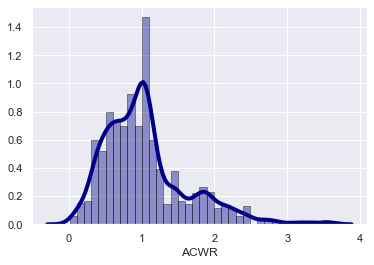

In [108]:
#Distribution of ACWR
sns.distplot(total['ACWR'], hist=True, kde = True, 
            bins=int(180/5), color = 'darkblue', 
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth': 4});

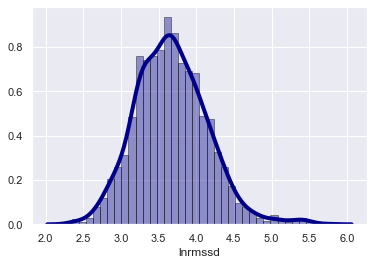

In [109]:
sns.distplot(total['lnrmssd'], hist=True, kde = True, 
            bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

In [110]:
#creating z scores for HRV and ACWR
total['lnrmssd_z'] = stats.zscore(total['lnrmssd'])

In [111]:
total['ACWR_z'] = stats.zscore(total['ACWR'])

In [112]:
#creating overtraining indicator
total["over_train"] = 0

In [113]:
total

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                   
2020-01-01       0d297d2410       4153.0                   104.0    3060.0   
                 35c7355282       5327.4                   465.0    3531.4   
                 4985083f4d       6501.8                   826.0    4002.8   
                 5d200bd1c6       7676.2                  1187.0    4474.2   
                 6be5033971       8850.6                  1548.0    4945.6   
...                                  ...                     ...       ...   
2020-05-12       78cc008261       5360.0                   994.2     473.0   
                 aa036185e3       5360.0                   671.8     473.0   
                 cf7e50bcde       5360.0                   349.4     473.0   
                 fde84801d8       5360.0                    27.0     473.0   
2020-05-13       0d297d2410       5360.0                    27.0     473.0   

                             steps_speed  body_temperature_avg  pulse_average  \
measurement_date user_code                                                      
2020-01-01       0d297d2410       32.980             36.370607           85.0   
                 35c7355282       28.352             36.370607           73.0   
                 4985083f4d       23.724             36.370607           88.0   
                 5d200bd1c6       19.096             36.370607           75.0   
                 6be5033971       14.468             36.370607           62.0   
...                                  ...                   ...            ...   
2020-05-12       78cc008261       32.020             36.000000           74.0   
                 aa036185e3       32.020             36.000000           68.0   
                 cf7e50bcde       32.020             36.000000           86.0   
                 fde84801d8       32.020             36.000000           70.0   
2020-05-13       0d297d2410       32.020             36.000000           70.0   

                             stand_hours_total  \
measurement_date user_code                       
2020-01-01       0d297d2410           3.000000   
                 35c7355282           3.333333   
                 4985083f4d           3.666667   
                 5d200bd1c6           4.000000   
                 6be5033971           4.333333   
...                                        ...   
2020-05-12       78cc008261           3.000000   
                 aa036185e3           3.000000   
                 cf7e50bcde           3.000000   
                 fde84801d8           3.000000   
2020-05-13       0d297d2410           3.000000   

                             total_number_of_flights_climbed  pulse_min  \
measurement_date user_code                                                
2020-01-01       0d297d2410                         8.000000       47.0   
                 35c7355282                        12.333333       57.0   
                 4985083f4d                        16.666667       60.0   
                 5d200bd1c6                        21.000000       53.0   
                 6be5033971                        28.000000       46.0   
...                                                      ...        ...   
2020-05-12       78cc008261                        15.000000       74.0   
                 aa036185e3                        15.000000       68.0   
                 cf7e50bcde                        15.000000       86.0   
                 fde84801d8                        15.000000       63.0   
2020-05-13       0d297d2410                        15.000000       63.0   

                             pulse_max  ...       rmssd      pnn50        bpm  \
measurement_date user_code              ...                                     
2020-01-01       0d297d2410      118.0  ...   46.418063  17.704062  77.364888   
                 35c7355282      128.0  ...   46.418063  17.704062  77.364888   
         

In [114]:
#total['over_train'].loc

total[(total.lnrmssd_z < -.31) & (total.ACWR_z > .41)]

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                    
2020-01-18       0d297d2410   7316.000000              175.000000    5427.0   
2020-01-19       0d297d2410  11879.000000              272.000000    8822.0   
2020-01-20       0d297d2410   4807.333333              141.333333   10116.0   
2020-01-21       0d297d2410  28314.000000              797.000000   22385.0   
2020-01-24       cdfbcad405   9326.000000               60.000000    7459.0   
...                                   ...                     ...       ...   
2020-05-11       4e1e508f56    224.272727             1443.333333      17.0   
                 6be5033971    241.818182             1477.666667      10.0   
                 9871ee5e7b    294.454545             1580.666667    3108.5   
                 a1c2e6b2eb    312.000000             1615.000000    5953.0   
2020-05-12       78cc008261   5360.000000              994.200000     473.0   

                             steps_speed  body_temperature_avg  pulse_average  \
measurement_date user_code                                                      
2020-01-18       0d297d2410    27.210000             36.370607           73.0   
2020-01-19       0d297d2410    21.150000             36.370607           87.0   
2020-01-20       0d297d2410    27.007500             36.370607           77.0   
2020-01-21       0d297d2410    61.980000             36.370607           87.0   
2020-01-24       cdfbcad405    86.390000             36.370607           92.0   
...                                  ...                   ...            ...   
2020-05-11       4e1e508f56     5.104545             36.000000          103.0   
                 6be5033971     4.093636             36.000000           62.0   
                 9871ee5e7b     1.060909             36.000000           75.5   
                 a1c2e6b2eb     0.050000             36.000000           67.0   
2020-05-12       78cc008261    32.020000             36.000000           74.0   

                             stand_hours_total  \
measurement_date user_code                       
2020-01-18       0d297d2410          12.333333   
2020-01-19       0d297d2410          15.000000   
2020-01-20       0d297d2410          12.363636   
2020-01-21       0d297d2410           2.000000   
2020-01-24       cdfbcad405           4.000000   
...                                        ...   
2020-05-11       4e1e508f56           4.578947   
                 6be5033971           4.210526   
                 9871ee5e7b           3.105263   
                 a1c2e6b2eb           2.736842   
2020-05-12       78cc008261           3.000000   

                             total_number_of_flights_climbed  pulse_min  \
measurement_date user_code                                                
2020-01-18       0d297d2410                           65.000       56.0   
2020-01-19       0d297d2410                            8.000       49.0   
2020-01-20       0d297d2410                            9.400       72.0   
2020-01-21       0d297d2410                           53.000       87.0   
2020-01-24       cdfbcad405                           27.000       57.0   
...                                                      ...        ...   
2020-05-11       4e1e508f56                           12.000       93.0   
                 6be5033971                           11.125       58.0   
                 9871ee5e7b                            8.500       71.5   
                 a1c2e6b2eb                            7.625       59.0   
2020-05-12       78cc008261                           15.000       74.0   

                             pulse_max  ...      rmssd      pnn50         bpm  \
measurement_date user_code              ...                                     
2020-01-18       0d297d2410      113.0  ...  15.996313   2.903750   93.875000   
2020-01-19       0d297d2410      127.0  ...  26.941625   7.827500   94.083333 

In [115]:
total.to_csv('../data/raw/total.csv')

In [119]:
total2 = pd.read_csv("../data/raw/total2.csv") #did it in R and am reimporting the file here

In [120]:
total2

,measurement_date,user_code,Unnamed: 0,steps_count,active_calories_burned,distance,steps_speed,body_temperature_avg,pulse_average,stand_hours_total,...,rmssd,pnn50,bpm,lnrmssd,is_resting,heart_rate,BMI,lnrmssd_z,ACWR_z,over_train
0,2020-01-01,0d297d2410,1,4153.0,104.0,3060.0,32.980,36.370607,85.0,3.000000,...,46.418063,17.704062,77.364888,3.671046,0.012658,82.683544,28.731943,1.119657e-14,-4.219539e-15,0
1,2020-01-01,35c7355282,2,5327.4,465.0,3531.4,28.352,36.370607,73.0,3.333333,...,46.418063,17.704062,77.364888,3.671046,0.000000,71.714286,27.462695,1.119657e-14,-4.219539e-15,0
2,2020-01-01,4985083f4d,3,6501.8,826.0,4002.8,23.724,36.370607,88.0,3.666667,...,46.418063,17.704062,77.364888,3.671046,0.007519,85.225564,16.607419,1.119657e-14,-4.219539e-15,0
3,2020-01-01,5d200bd1c6,4,7676.2,1187.0,4474.2,19.096,36.370607,75.0,4.000000,...,46.418063,17.704062,77.364888,3.671046,0.006405,73.417015,20.380704,1.119657e-14,-4.219539e-15,0
4,2020-01-01,6be5033971,5,8850.6,1548.0,4945.6,14.468,36.370607,62.0,4.333333,...,46.418063,17.704062,77.364888,3.671046,0.005291,61.608466,20.075428,1.119657e-14,-4.219539e-15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,2020-05-12,78cc008261,2120,5360.0,994.2,473.0,32.020,36.000000,74.0,3.000000,...,30.199000,7.070000,74.000000,3.407809,0.000000,74.000000,30.375473,-5.530711e-01,7.520491e-01,1
2120,2020-05-12,aa036185e3,2121,5360.0,671.8,473.0,32.020,36.000000,68.0,3.000000,...,120.812000,43.430000,68.000000,4.794236,0.000000,68.000000,32.299272,2.359861e+00,-4.648862e-01,0
2121,2020-05-12,cf7e50bcde,2122,5360.0,349.4,473.0,32.020,36.000000,86.0,3.000000,...,79.785500,31.815000,71.500000,4.225799,0.000000,97.000000,20.240869,1.165556e+00,-1.501283e+00,0
2122,2020-05-12,fde84801d8,2123,5360.0,27.0,473.0,32.020,36.000000,70.0,3.000000,...,38.759000,20.200000,75.000000,3.657363,0.155556,69.511111,28.519117,-2.874891e-02,-1.218057e+00,0


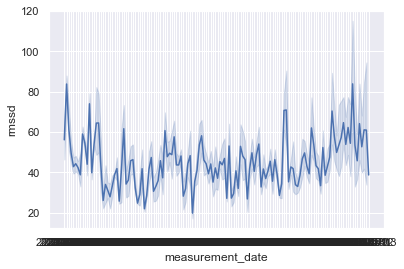

In [121]:
sns.set(style="darkgrid")

# Load an example dataset with long-form data
#fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="measurement_date", y="rmssd",
             data=total2);

In [122]:
total2.measurement_date = pd.to_datetime(total2.measurement_date, format = '%Y-%m-%d')

In [123]:
total2.set_index(['measurement_date','user_code'], inplace=True) #reseting the index

In [124]:
total2.columns

Index(['Unnamed: 0', 'steps_count', 'active_calories_burned', 'distance',
       'steps_speed', 'body_temperature_avg', 'pulse_average',
       'stand_hours_total', 'total_number_of_flights_climbed', 'pulse_min',
       'pulse_max', 'average_spo2_value', 'distance_mi', 'ACWR', 'gender',
       'age_range', 'height', 'weight', 'height_in', 'weight_lbs', 'rmssd',
       'pnn50', 'bpm', 'lnrmssd', 'is_resting', 'heart_rate', 'BMI',
       'lnrmssd_z', 'ACWR_z', 'over_train'],
      dtype='object')

In [125]:
cols =['steps_count','active_calories_burned','steps_speed','body_temperature_avg','pulse_average',
      'stand_hours_total','height_in','weight_lbs','lnrmssd','heart_rate',
       'BMI','lnrmssd_z','ACWR_z']

In [126]:
import statsmodels.api as sm
y = total2['over_train']

In [127]:
X = total2[cols]

In [128]:
logit_model=sm.Logit(y,X)

In [129]:
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.128507
         Iterations 10


In [130]:
print(result.summary2())
total2.to_csv("../data/raw/total2.csv")

                             Results: Logit
Model:                Logit              Pseudo R-squared:   0.594      
Dependent Variable:   over_train         AIC:                571.8960   
Date:                 2020-06-23 10:33   BIC:                645.4897   
No. Observations:     2124               Log-Likelihood:     -272.95    
Df Model:             12                 LL-Null:            -671.83    
Df Residuals:         2111               LLR p-value:        4.9780e-163
Converged:            1.0000             Scale:              1.0000     
No. Iterations:       10.0000                                           
------------------------------------------------------------------------
                        Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------
steps_count             -0.0000   0.0000 -1.6364 0.1018  -0.0001  0.0000
active_calories_burned  -0.0002   0.0002 -1.4344 0.1515  -0.0006  0.0001
steps_s

In [131]:
total2.BMI

measurement_date  user_code 
2020-01-01        0d297d2410    28.731943
                  35c7355282    27.462695
                  4985083f4d    16.607419
                  5d200bd1c6    20.380704
                  6be5033971    20.075428
                                  ...    
2020-05-12        78cc008261    30.375473
                  aa036185e3    32.299272
                  cf7e50bcde    20.240869
                  fde84801d8    28.519117
2020-05-13        0d297d2410    28.731943
Name: BMI, Length: 2124, dtype: float64

In [132]:
dummies = pd.get_dummies(total2, sparse = True) #one hot encoding categorical variables

In [133]:
del dummies['Unnamed: 0'] #removing random index variable

In [134]:
dummies

steps_count  active_calories_burned  distance  \
measurement_date user_code                                                   
2020-01-01       0d297d2410       4153.0                   104.0    3060.0   
                 35c7355282       5327.4                   465.0    3531.4   
                 4985083f4d       6501.8                   826.0    4002.8   
                 5d200bd1c6       7676.2                  1187.0    4474.2   
                 6be5033971       8850.6                  1548.0    4945.6   
...                                  ...                     ...       ...   
2020-05-12       78cc008261       5360.0                   994.2     473.0   
                 aa036185e3       5360.0                   671.8     473.0   
                 cf7e50bcde       5360.0                   349.4     473.0   
                 fde84801d8       5360.0                    27.0     473.0   
2020-05-13       0d297d2410       5360.0                    27.0     473.0   

                             steps_speed  body_temperature_avg  pulse_average  \
measurement_date user_code                                                      
2020-01-01       0d297d2410       32.980             36.370607           85.0   
                 35c7355282       28.352             36.370607           73.0   
                 4985083f4d       23.724             36.370607           88.0   
                 5d200bd1c6       19.096             36.370607           75.0   
                 6be5033971       14.468             36.370607           62.0   
...                                  ...                   ...            ...   
2020-05-12       78cc008261       32.020             36.000000           74.0   
                 aa036185e3       32.020             36.000000           68.0   
                 cf7e50bcde       32.020             36.000000           86.0   
                 fde84801d8       32.020             36.000000           70.0   
2020-05-13       0d297d2410       32.020             36.000000           70.0   

                             stand_hours_total  \
measurement_date user_code                       
2020-01-01       0d297d2410           3.000000   
                 35c7355282           3.333333   
                 4985083f4d           3.666667   
                 5d200bd1c6           4.000000   
                 6be5033971           4.333333   
...                                        ...   
2020-05-12       78cc008261           3.000000   
                 aa036185e3           3.000000   
                 cf7e50bcde           3.000000   
                 fde84801d8           3.000000   
2020-05-13       0d297d2410           3.000000   

                             total_number_of_flights_climbed  pulse_min  \
measurement_date user_code                                                
2020-01-01       0d297d2410                         8.000000       47.0   
                 35c7355282                        12.333333       57.0   
                 4985083f4d                        16.666667       60.0   
                 5d200bd1c6                        21.000000       53.0   
                 6be5033971                        28.000000       46.0   
...                                                      ...        ...   
2020-05-12       78cc008261                        15.000000       74.0   
                 aa036185e3                        15.000000       68.0   
                 cf7e50bcde                        15.000000       86.0   
                 fde84801d8                        15.000000       63.0   
2020-05-13       0d297d2410                        15.000000       63.0   

                             pulse_max  ...        ACWR_z  over_train  \
measurement_date user_code              ...                             
2020-01-01       0d297d2410      118.0  ... -4.219539e-15           0   
                 35c7355282      128.0  ... -4.219539e-15           0   
                 4985083f4d      129.0  .

In [135]:
dummies.columns #figure out why distance variable is weird!!!!

Index(['steps_count', 'active_calories_burned', 'distance', 'steps_speed',
       'body_temperature_avg', 'pulse_average', 'stand_hours_total',
       'total_number_of_flights_climbed', 'pulse_min', 'pulse_max',
       'average_spo2_value', 'distance_mi', 'ACWR', 'height', 'weight',
       'height_in', 'weight_lbs', 'rmssd', 'pnn50', 'bpm', 'lnrmssd',
       'is_resting', 'heart_rate', 'BMI', 'lnrmssd_z', 'ACWR_z', 'over_train',
       'gender_f', 'gender_m', 'age_range_18-24', 'age_range_25-34',
       'age_range_35-44', 'age_range_45-54', 'age_range_55-64',
       'age_range_65-74'],
      dtype='object')

In [136]:
dummies.to_csv("../data/processed/processed.csv")